# Relatório 1
Aluno: Pedro H. M. Tashima

## Descrição do dataset

O conjunto de dados "Sistema E-Saude - Perfil de atendimento Odontológico nas Unidades Municipais de Saúde de Curitiba" reúne informações sobre atendimentos realizados por profissionais de odontologia em unidades de saúde. Esses dados mostram o perfil dos usuários atendidos, com informações demográficas, socioeconômicas e de saúde, além de detalhes sobre os procedimentos realizados.

Este contjunto de dados pode ser encontrado no [Portal de Dados Abertos da Prefeitura de Curitiba](https://dadosabertos.curitiba.pr.gov.br/conjuntodado/detalhe?chave=afa9c22d-4fd7-407a-857b-1ab29fc305a3).

In [1]:
import pandas as pd

df = pd.read_csv('./2025-07-06_Sistema_E-Saude_Odontologico_-_Base_de_Dados.csv', sep=';', encoding='latin-1')

df

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/03/2025 00:02:37,24/10/2001 00:00:00,F,6,ODONTOLOGICO,2639467,UPA FAZENDINHA,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NaN,NaN,NaN,CURITIBA,CAMPO DE SANTANA,Brasileira,2199063,1,1,122756
1,01/03/2025 00:39:57,22/01/2003 00:00:00,F,6,ODONTOLOGICO,2639467,UPA FAZENDINHA,101020090,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,223208,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,VISTA ALEGRE,Brasileira,3717342,1,1,122756
2,01/03/2025 00:39:57,22/01/2003 00:00:00,F,6,ODONTOLOGICO,2639467,UPA FAZENDINHA,307020029,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,223208,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,VISTA ALEGRE,Brasileira,3717342,1,1,122756
3,01/03/2025 00:59:30,23/11/1962 00:00:00,M,6,ODONTOLOGICO,2639467,UPA FAZENDINHA,101020090,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,223208,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,SAO BRAZ,Brasileira,4267263,1,1,122756
4,01/03/2025 00:59:30,23/11/1962 00:00:00,M,6,ODONTOLOGICO,2639467,UPA FAZENDINHA,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,SAO BRAZ,Brasileira,4267263,1,1,122756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326165,06/05/2025 17:29:01,15/03/1951 00:00:00,M,6,ODONTOLOGICO,17108,UMS CAJURU,101020104,ORIENTACAO DE HIGIENE BUCAL,322405,...,NAO PARTICIPA,TELEVISAO,CARRO,CURITIBA,CAJURU,Brasileira,72343,1,1,41078
326166,30/04/2025 10:14:45,25/02/1997 00:00:00,F,6,ODONTOLOGICO,17094,UMS CAMARGO,101020104,ORIENTACAO DE HIGIENE BUCAL,322405,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,CAJURU,Brasileira,12398062,1,1,41584
326167,06/03/2025 07:58:24,17/11/1993 00:00:00,F,6,ODONTOLOGICO,17329,UMS VILA MACHADO,307030059,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,322405,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,1191391,1,1,41660
326168,19/05/2025 15:05:15,09/08/1993 00:00:00,M,6,ODONTOLOGICO,17051,UMS SOLITUDE PSF,101020104,ORIENTACAO DE HIGIENE BUCAL,322425,...,OUTROS,RADIO,ONIBUS,CURITIBA,CAJURU,Brasileira,12127039,1,1,2736


## Limpeza

In [2]:
print("O conjunto de dados antes da limpeza, possui", df.shape[0], "linhas")

O conjunto de dados antes da limpeza, possui 326170 linhas


Pela natureza do sistema de coleta de dados, algumas colunas não são válidas ou utilizadas para atendimentos odontológicos. Outras, são raramente preenchidas. Por esses motivos, colunas totalmente vazias ou com poucos valores não serão utilizadas.

In [3]:
df.isnull().sum()

Data do Atendimento                                  0
Data de Nascimento                                   0
Sexo                                                 0
Código do Tipo de Unidade                            0
Tipo de Unidade                                      0
Código da Unidade                                    0
Descrição da Unidade                                 0
Código do Procedimento                               0
Descrição do Procedimento                            0
Código do CBO                                        0
Descrição do CBO                                     0
Código do CID                                   326170
Descrição do CID                                326170
Solicitação de Exames                                0
Qtde Prescrita Farmácia Curitibana                   0
Qtde Dispensada Farmácia Curitibana                  0
Qtde de Medicamento Não Padronizado                  0
Encaminhamento para Atendimento Especialista         0
Área de At

Apenas as colunas consideradas válidas para a análise foram mantidas, sendo elas:
- Data do Atendimento
- Data de Nascimento
- Sexo
- Descrição da Unidade
- Descrição do Procedimento
- Descrição do CBO
- Energia Elétrica
- Cômodos
- Municício
- Bairro
- Nacionalidade

Uma coluna adicional, "Idade", foi criada a partir da diferença entre a data do atendimento e a data de nascimento.

Linhas com valores nulos e com número de cômodos considerados inválidos (acima de 20) foram removidas.

In [4]:
df = df.loc[:, ['Data do Atendimento', 'Data de Nascimento', 'Sexo', 'Descrição da Unidade', 'Descrição do Procedimento', 'Descrição do CBO', 'Energia Elétrica', 'Cômodos', 'Municício', 'Bairro', 'Nacionalidade']].copy()

df = df.copy()

# Remove linhas com NaN
df = df.dropna()

In [5]:
# Transformar em objetos datetime
df['Data do Atendimento'] = pd.to_datetime(df['Data do Atendimento'], format='%d/%m/%Y %H:%M:%S')
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], format='%d/%m/%Y %H:%M:%S')
df['Idade'] = (df['Data do Atendimento'] - df['Data de Nascimento']).dt.days // 365

In [6]:
# Transformar em booleanos
df['Energia Elétrica'] = df['Energia Elétrica'].map({'Nao': False, 'Sim': True})

In [7]:
# Transformar em integer
df['Cômodos'] = df['Cômodos'].astype(int)
# Limpeza de casas com mais de 20 comodos
df = df[df['Cômodos'] <= 20]

## Análise Exploratória de Dados

### Distribuição dos cômodos das casas dos pacientes:

Mediana de cômodos: 5.0


<Axes: title={'center': 'Gráfico 1: Distribuição dos cômodos das casas dos pacientes'}, xlabel='Número de cômodos', ylabel='Número de pacientes'>

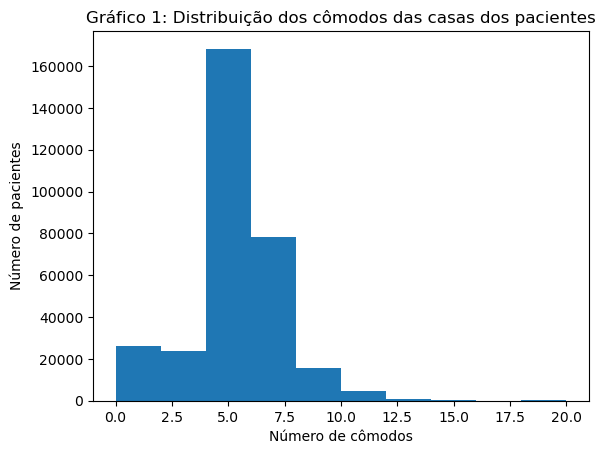

In [27]:
print("Mediana de cômodos:", df['Cômodos'].median())
df['Cômodos'].plot(kind="hist", bins=10, title="Gráfico 1: Distribuição dos cômodos das casas dos pacientes", xlabel="Número de cômodos", ylabel="Número de pacientes")

O gráfico 1 mostra que a grande maioria dos pacientes residem em casas com até 5 cômodos, sendo essa a mediana. A distribuição é assimétrica à esquerda. Alguns outliers removidos no processo de limpeza indicam que os dados podem conter erros.

### Distribuição de idade dos pacientes:

Tabela 1: Quantis de idade
0.25    18.0
0.50    35.0
0.75    52.0
Name: Idade, dtype: float64


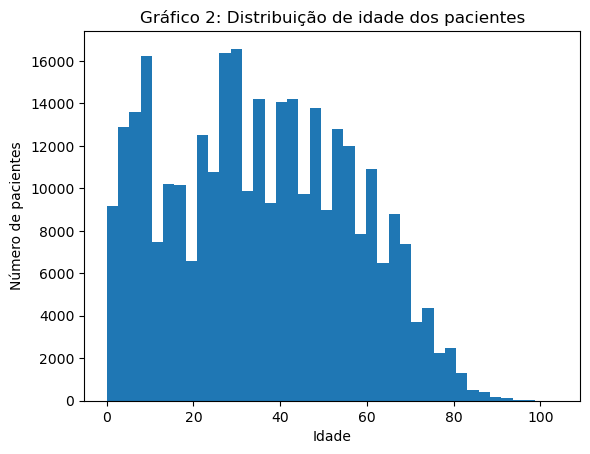

In [ ]:
df['Idade'].plot(kind="hist",bins=40, title="Gráfico 2: Distribuição de idade dos pacientes", xlabel="Idade", ylabel="Número de pacientes")

print("Tabela 1: Quantis de idade")
print(df['Idade'].quantile([0.25, 0.5, 0.75]))

A maior parte dos pacientes são adultos, sendo 75% com menos de 52 anos (Gráfico 2, Tabela 1).

## Número de atêndimentos de homens e mulheres:

Tabela 2: Percentual de atendimentos por sexo
Sexo
F    59.901276
M    40.098724
Name: proportion, dtype: float64


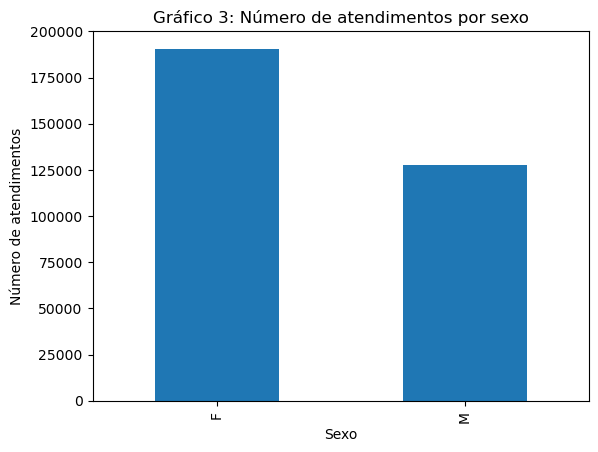

In [ ]:
df.groupby('Sexo').size().plot(kind='bar', title="Gráfico 3: Número de atendimentos por sexo", xlabel="Sexo", ylabel="Número de atendimentos")

sexo_counts = df['Sexo'].value_counts(normalize=True) * 100
print("Tabela 2: Percentual de atendimentos por sexo")
print(sexo_counts)

A maior parte dos pacientes atendidos são do sexo feminino, com quase 60% dos atendimentos (Tabela 2).

### Unidades com mais atendimentos:

<Axes: title={'center': 'Gráfico 4: Unidades com mais atendimentos'}, xlabel='Unidade', ylabel='Número de atendimentos'>

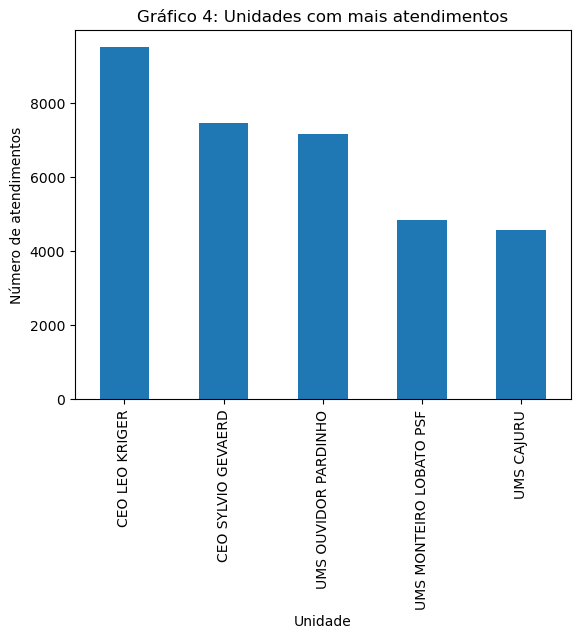

In [40]:
df.groupby('Descrição da Unidade').size().sort_values(ascending=False).head(5).plot(kind='bar', title="Gráfico 4: Unidades com mais atendimentos", xlabel="Unidade", ylabel="Número de atendimentos")

## Bairros com mais atendimentos:

<Axes: title={'center': 'Gráfico 5: Bairros com mais atendimentos'}, xlabel='Bairro', ylabel='Número de atendimentos'>

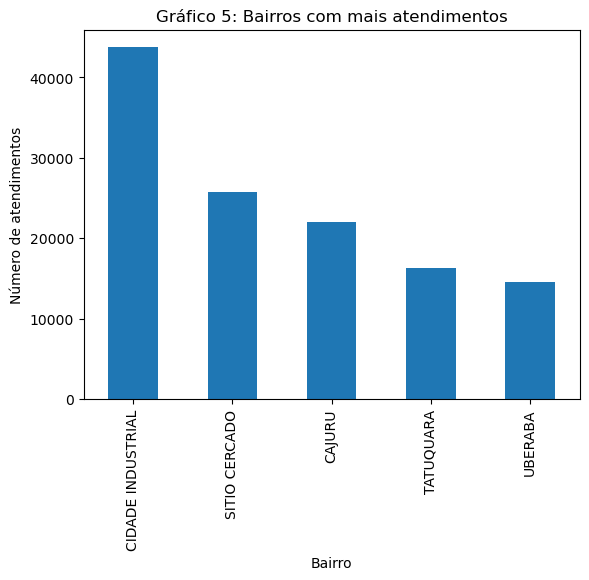

In [41]:
df.groupby('Bairro').size().sort_values(ascending=False).head(5).plot(kind='bar', title="Gráfico 5: Bairros com mais atendimentos", xlabel="Bairro", ylabel="Número de atendimentos")

### Procedimentos mais comuns:

<Axes: title={'center': 'Gráfico 6: Procedimentos mais comuns'}, xlabel='Procedimento', ylabel='Número de atendimentos'>

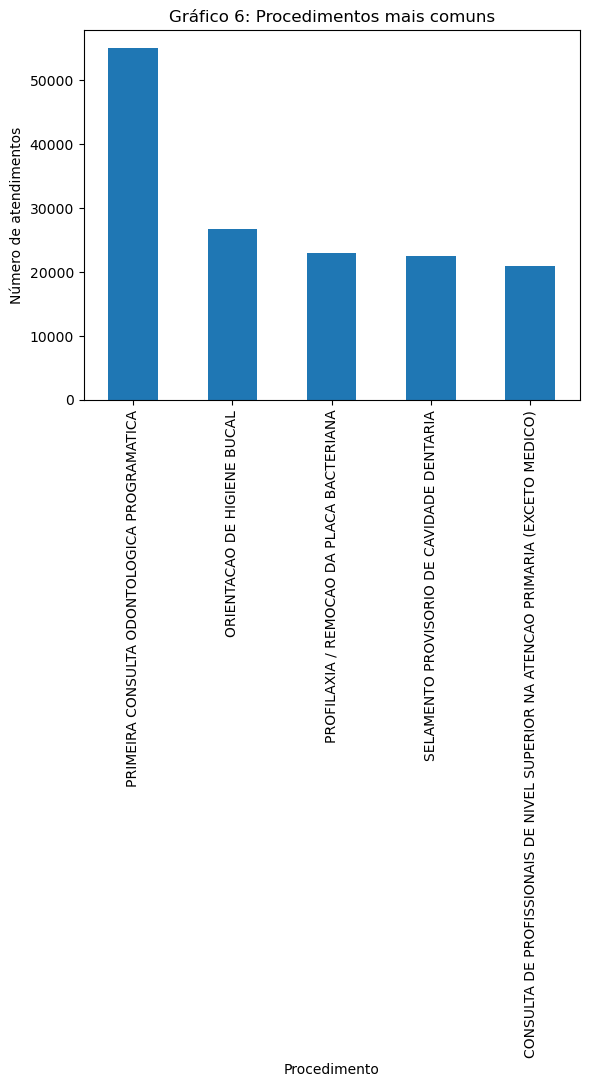

In [42]:
df.groupby('Descrição do Procedimento').size().sort_values(ascending=False).head(5).plot(kind='bar', title="Gráfico 6: Procedimentos mais comuns", xlabel="Procedimento", ylabel="Número de atendimentos")

### Número de atendimentos em que os pacientes relataram ter energia elétrica:

<Axes: title={'center': 'Gráfico 7: Atendimentos de pacientes com ou sem energia elétrica'}, xlabel='Energia Elétrica', ylabel='Número de atendimentos'>

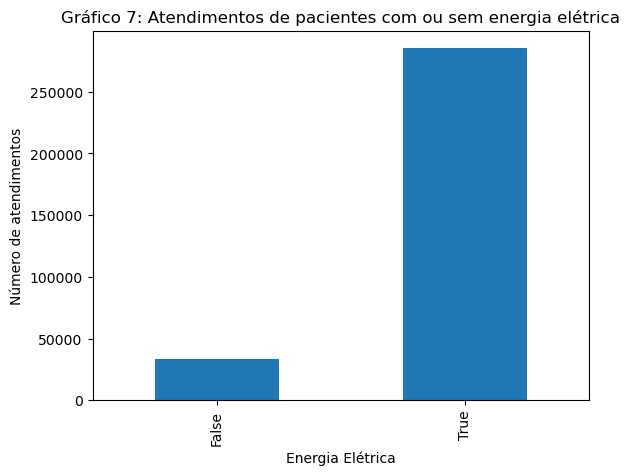

In [44]:
df.groupby('Energia Elétrica').size().plot(kind='bar', title="Gráfico 7: Atendimentos de pacientes com ou sem energia elétrica", xlabel="Energia Elétrica", ylabel="Número de atendimentos")

Tabela 4: Percentual de pacientes com/sem energia elétrica por bairro (top 10 bairros com mais atendimentos)
Energia Elétrica       False      True 
Bairro                                 
CIDADE INDUSTRIAL   9.107535  90.892465
SITIO CERCADO       7.656468  92.343532
CAJURU             12.989672  87.010328
TATUQUARA          12.890386  87.109614
UBERABA            12.071087  87.928913
BOQUEIRAO          10.878335  89.121665
PINHEIRINHO         9.493096  90.506904
XAXIM               9.028583  90.971417
ALTO BOQUEIRAO      9.676372  90.323628
CAMPO DE SANTANA   11.826822  88.173178


<Axes: title={'center': 'Gráfico 9: Percentual de pacientes com/sem energia elétrica por bairro'}, xlabel='Bairro', ylabel='Percentual de atendimentos'>

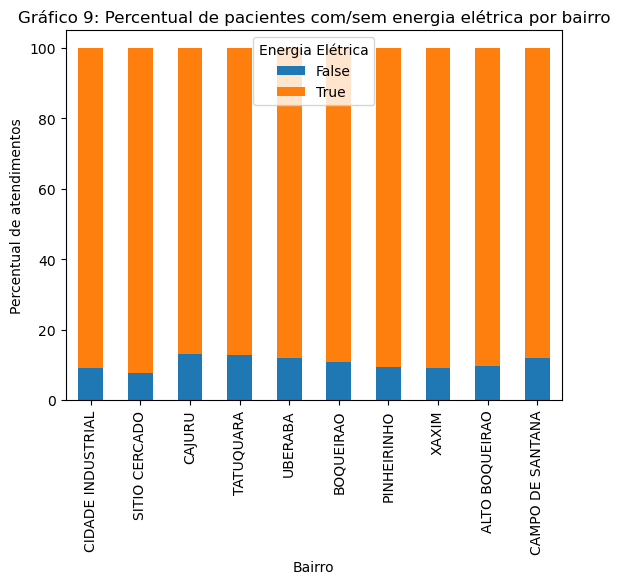

In [ ]:
energia_bairro = pd.crosstab(df['Bairro'], df['Energia Elétrica'], normalize='index') * 100
print("Tabela 4: Percentual de pacientes com/sem energia elétrica por bairro (top 10 bairros com mais atendimentos)")
top_bairros = df['Bairro'].value_counts().head(10).index
print(energia_bairro.loc[top_bairros])

energia_bairro.loc[top_bairros].plot(kind='bar', stacked=True, title="Gráfico 9: Percentual de pacientes com/sem energia elétrica por bairro", ylabel="Percentual de atendimentos", xlabel="Bairro")

A distribuição de pacientes que relataram não ter energia elétrica é similar entre os bairros com mais atendimentos, com uma variação entre 7 e 12% de pacientes que relataram não ter energia elétrica.

## Distribuição da nacionalidade dos pacientes atendidos:

Tabela 3: Percentual de atendimentos por nacionalidade
Nacionalidade
Brasileira       93.910049
Estrangeiro       6.072670
Não informado     0.011626
Naturalizado      0.005656
Name: proportion, dtype: float64


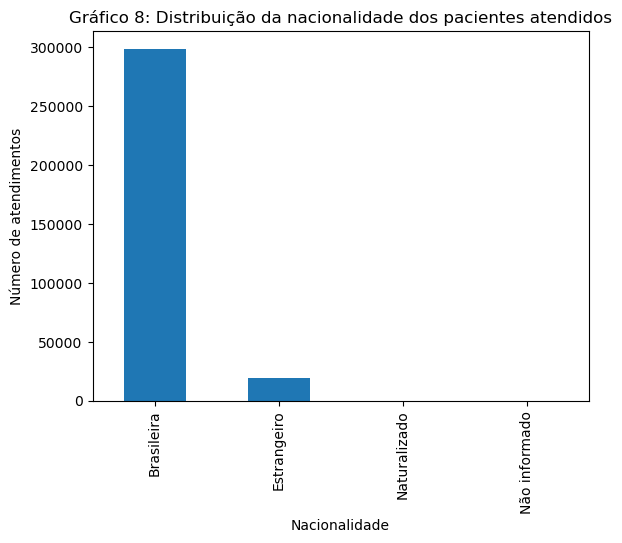

In [ ]:
df.groupby('Nacionalidade').size().plot(kind='bar', title="Gráfico 8: Distribuição da nacionalidade dos pacientes atendidos", xlabel="Nacionalidade", ylabel="Número de atendimentos")

nacionalidade_counts = df['Nacionalidade'].value_counts(normalize=True) * 100
print("Tabela 3: Percentual de atendimentos por nacionalidade")
print(nacionalidade_counts)

## Perguntas

1. Quais os tipos de atendimentos mais comuns realizados pelos dentistas da rede municipal de saúde?
2. Os procedimentos variam de acordo com o sexo do paciente?
3. Existe correlação entre o número de cômodos da residência e o procedimento realizado?
4. Existe correlação entre ter energia elétrica e o bairro do paciente?
5. Existe correlação entre a idade do paciente e o tipo de procedimento realizado?
6. A nacionalidade do paciente influencia no número de cômodos da residência?
7. Qual a distribuição dos atendimentos ao longo dos meses?